In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import LinearSegmentedColormap


from rdkit import Chem, DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
working_library =[]
with open('chemical_list.csv', 'r') as file:
    for index, line in enumerate(file):
        if 0<index: # Kee the fist smile code as example
            mol=Chem.MolFromSmiles(line.split(',')[2]) # Converting SMILES codes into rdkit mol
            mol.SetProp('_Name',line.split(',')[1]) # Adding the name for each molecule
            working_library.append(mol)


/Users/duhwalee/Library/Python/3.9/lib/python/site-packages/rdkit/Chem/Draw/IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


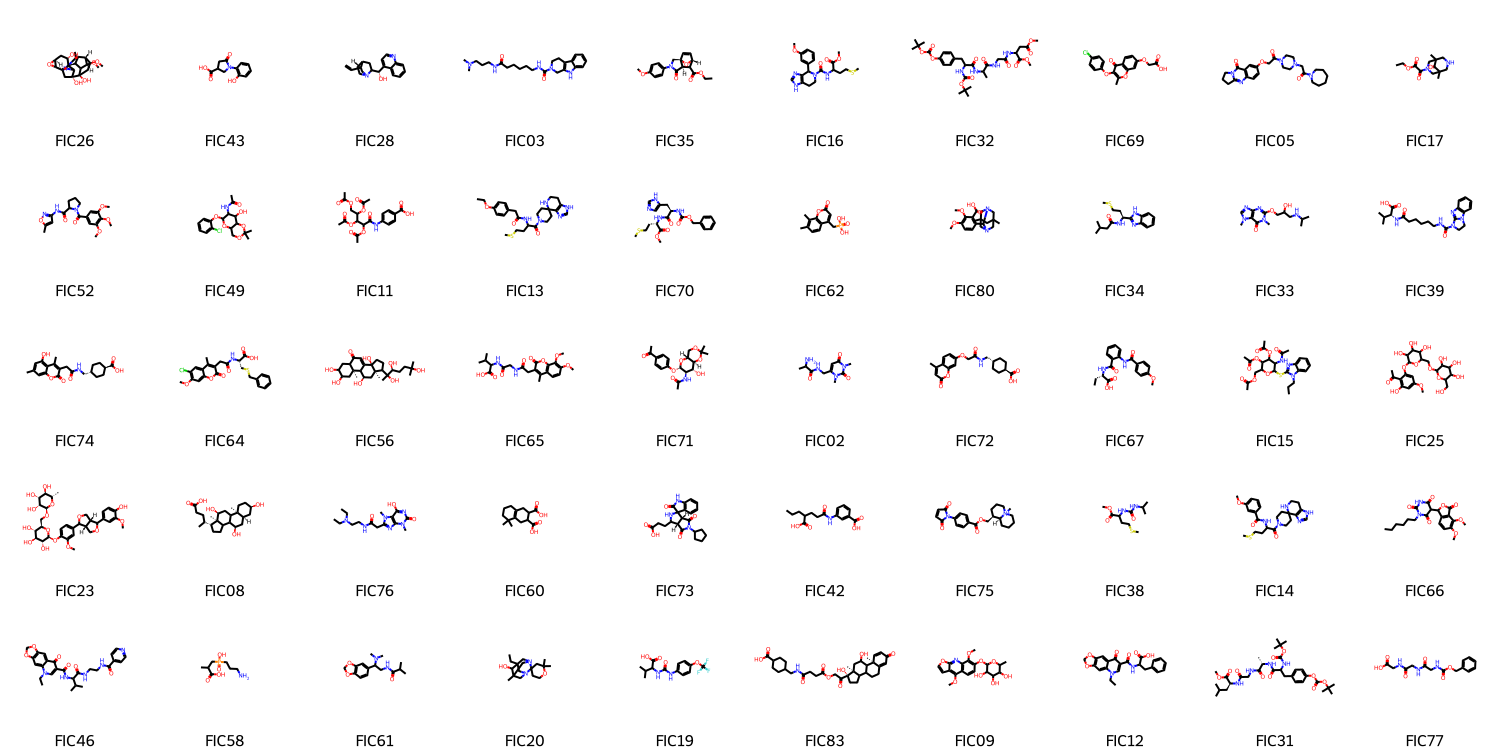

In [6]:
Draw.MolsToGridImage(working_library,molsPerRow=10,subImgSize=(150,150),legends=[mol.GetProp('_Name') for mol in working_library])

In [7]:
fps= [FingerprintMols.FingerprintMol(mol) for mol in working_library]
print(len(working_library))
print(len(fps))

84
84


In [8]:
size=len(working_library)
hmap=np.empty(shape=(size,size))
table=pd.DataFrame()
for index, i in enumerate(fps):
    for jndex, j in enumerate(fps):
        similarity=DataStructs.TanimotoSimilarity(i,j)
        hmap[index,jndex]=similarity
        table.loc[working_library[index].GetProp('_Name'),working_library[jndex].GetProp('_Name')]=similarity

In [9]:
linked = linkage(hmap,'complete')
labelList = [mol.GetProp('_Name') for mol in working_library]

In [10]:
table.head(10)

,FIC26,FIC43,FIC28,FIC03,FIC35,FIC16,FIC32,FIC69,FIC05,FIC17,...,FIC50,FIC68,FIC06,FIC57,FIC79,FIC59,FIC10,FIC21,FIC55,FIC40
FIC26,1.000000,0.434053,0.365523,0.291577,0.445196,0.337396,0.314858,0.284418,0.310848,0.409814,...,0.272036,0.364865,0.390625,0.296422,0.258347,0.458506,0.343469,0.359903,0.306178,0.288262
FIC43,0.434053,1.000000,0.416468,0.432749,0.560091,0.456103,0.436975,0.427007,0.445977,0.341829,...,0.413123,0.427123,0.354795,0.416223,0.419897,0.415350,0.461279,0.480372,0.453125,0.415476
FIC28,0.365523,0.416468,1.000000,0.431020,0.361274,0.342970,0.341110,0.260076,0.356880,0.374185,...,0.283805,0.280488,0.424318,0.305996,0.279668,0.464286,0.355413,0.331928,0.321404,0.325764
FIC03,0.291577,0.432749,0.431020,1.000000,0.347772,0.468923,0.335878,0.282240,0.359915,0.359900,...,0.314943,0.267584,0.453431,0.278823,0.365546,0.472917,0.387841,0.363042,0.338325,0.467769
FIC35,0.445196,0.560091,0.361274,0.347772,1.000000,0.437136,0.371803,0.339768,0.404954,0.365934,...,0.348624,0.351351,0.416314,0.352732,0.306977,0.472112,0.414338,0.485908,0.429102,0.355086
FIC16,0.337396,0.456103,0.342970,0.468923,0.437136,1.000000,0.387492,0.337945,0.397606,0.360310,...,0.352426,0.311575,0.472687,0.286408,0.410898,0.474950,0.498026,0.478833,0.417714,0.567096
FIC32,0.314858,0.436975,0.341110,0.335878,0.371803,0.387492,1.000000,0.274268,0.348718,0.374677,...,0.327362,0.365769,0.438509,0.363469,0.400364,0.478903,0.436130,0.351285,0.377289,0.415410
FIC69,0.284418,0.427007,0.260076,0.282240,0.339768,0.337945,0.274268,1.000000,0.324891,0.324841,...,0.279621,0.243631,0.396552,0.261168,0.252252,0.455508,0.294521,0.345165,0.316901,0.290323
FIC05,0.310848,0.445977,0.356880,0.359915,0.404954,0.397606,0.348718,0.324891,1.000000,0.387176,...,0.331614,0.308153,0.439197,0.291959,0.314943,0.463265,0.400539,0.415430,0.363154,0.322238
FIC17,0.409814,0.341829,0.374185,0.359900,0.365934,0.360310,0.374677,0.324841,0.387176,1.000000,...,0.325611,0.392707,0.312883,0.346821,0.336100,0.426357,0.385071,0.358412,0.332953,0.348659


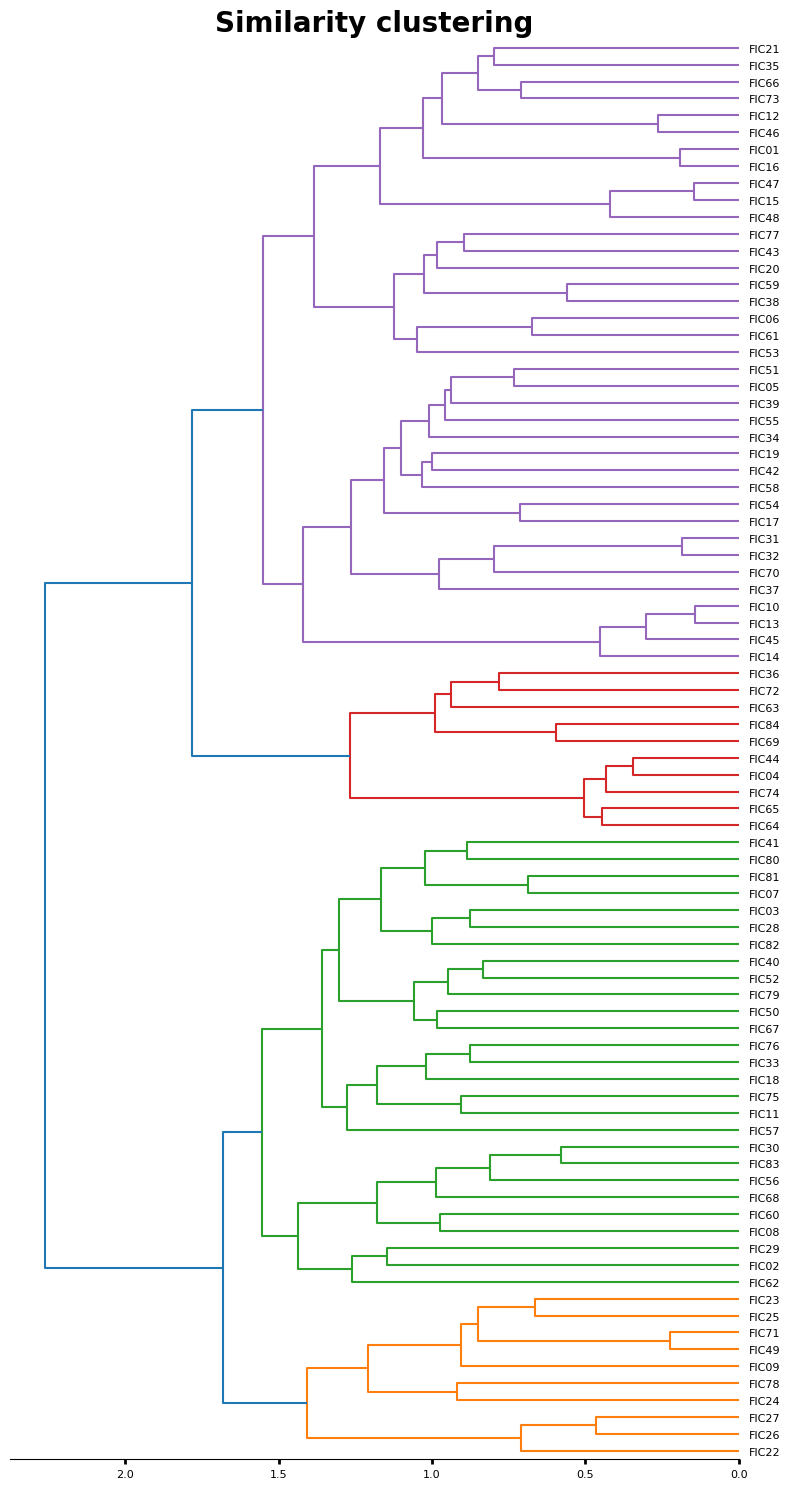

In [11]:
plt.figure(figsize=(8,15))

ax1=plt.subplot()
o=dendrogram(linked,
            orientation='left',
            labels=labelList,
            count_sort='ascending',
            distance_sort='descending',
            show_leaf_counts=True)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.title('Similarity clustering',fontsize=20,weight='bold')
plt.tick_params ('both',width=2,labelsize=8)
plt.tight_layout()
plt.show()

In [12]:
# This will give us the clusters in order as the last plot
new_data=list(reversed(o['ivl']))

# we create a new table with the order of HCL
hmap_2=np.empty(shape=(size,size))
for index,i in enumerate(new_data):
    for jndex,j in enumerate(new_data):
        hmap_2[index,jndex]=table.loc[i].at[j]

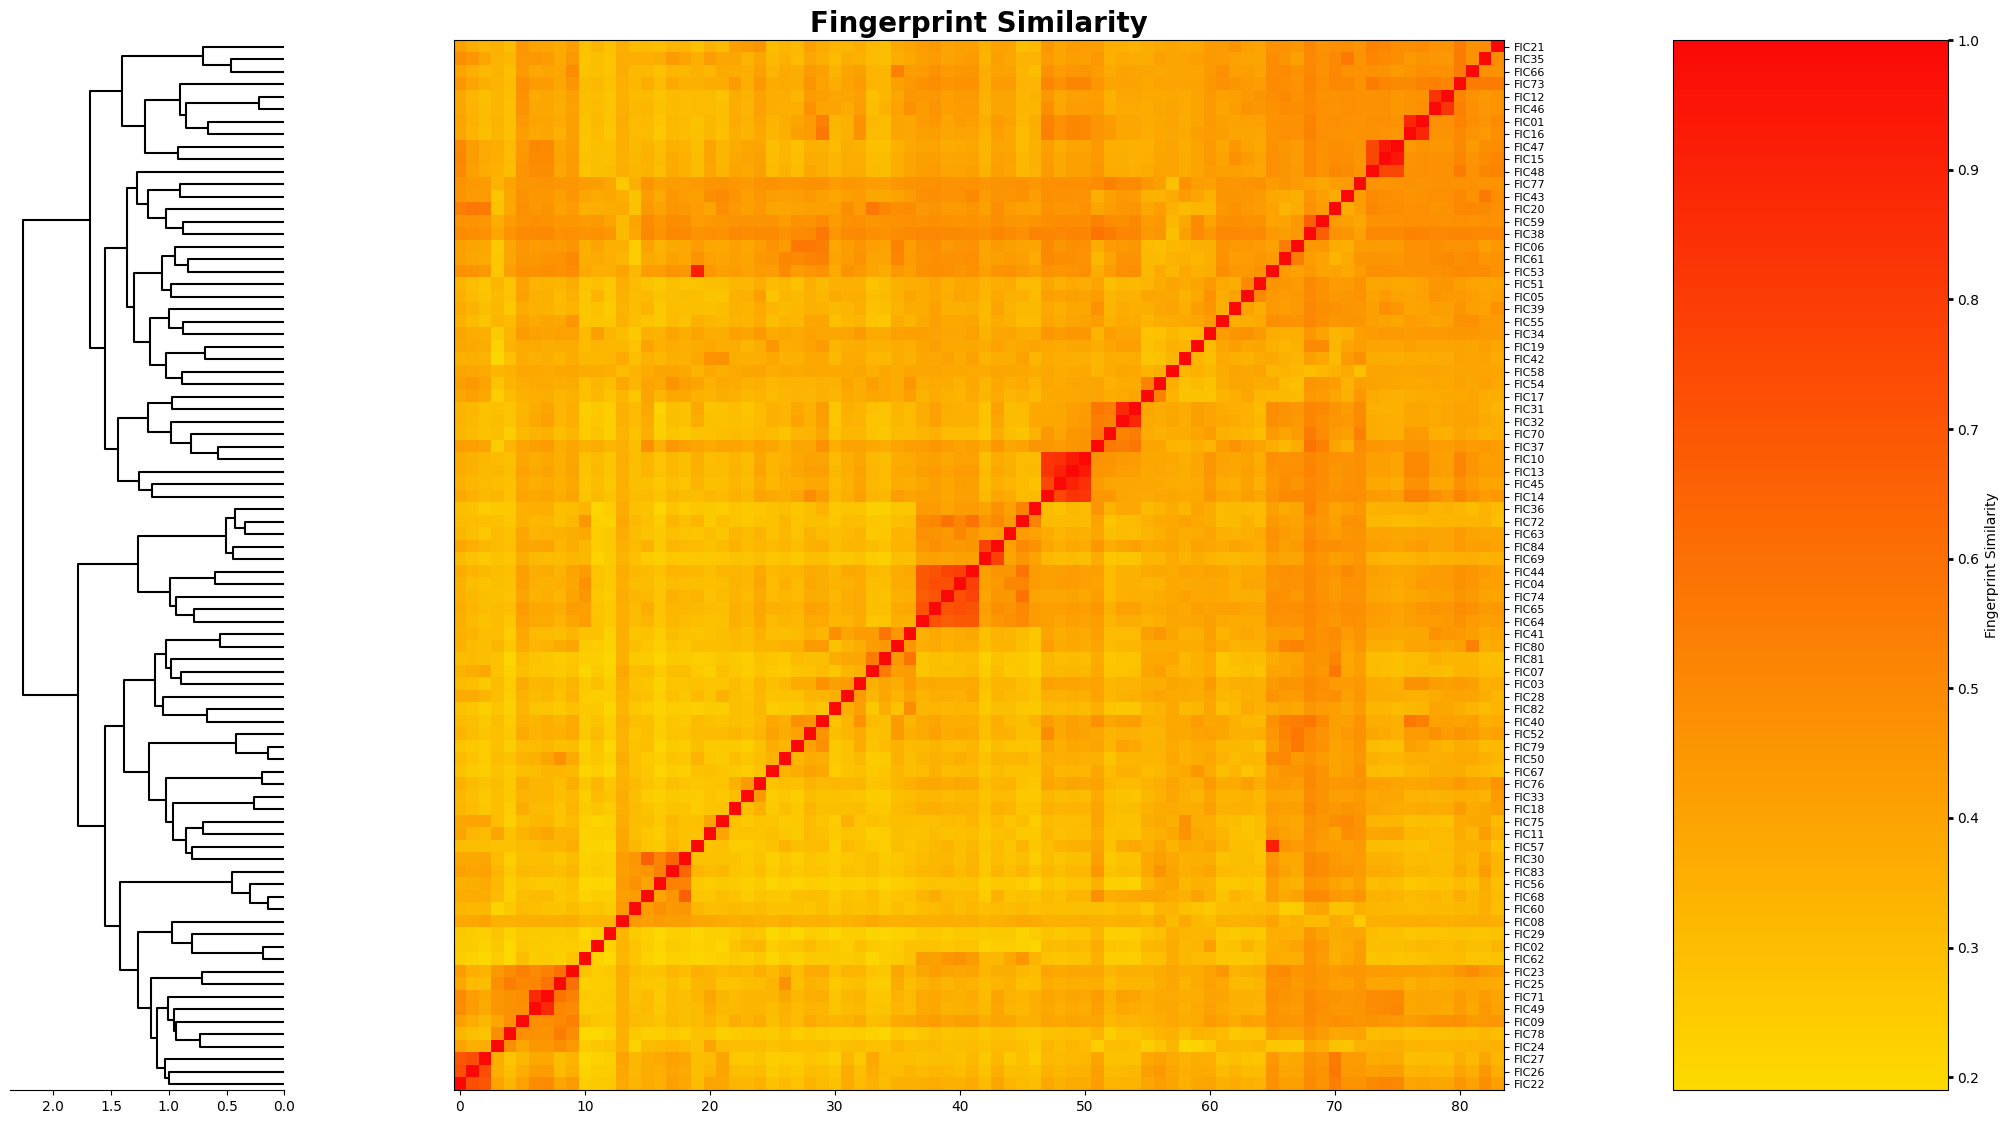

In [13]:
figure= plt.figure(figsize=(25,30))
gs1 = gridspec.GridSpec(2,7)
gs1.update(wspace=0.01)
ax1 = plt.subplot(gs1[0:-1, :1])

def black_link_color_func(x):
    return 'black'

dendrogram(linked, orientation='left', distance_sort='descending',show_leaf_counts=True,no_labels=True, link_color_func=black_link_color_func)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(gs1[0:-1,1:6])

custom_colors = [(254/256, 218/256, 0/256), (252/256, 9/256, 7/256)]
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", custom_colors, N=256)

hmap_2_flipped = np.flip(hmap_2, axis=1)
new_data_flipped = new_data[::-1]

f=ax2.imshow (hmap_2_flipped, cmap=custom_cmap, interpolation='nearest')

ax2.set_title('Fingerprint Similarity',fontsize=20,weight='bold')
ax2.yaxis.tick_right()
# ax2.set_xticks (range(len(new_data_flipped)))
ax2.set_yticks (range(len(new_data)))
# ax2.set_xticklabels (new_data_flipped,rotation=90,size=8)
ax2.set_yticklabels (new_data,size=8)



ax3 = plt.subplot(gs1[0:-1,6:7])
m=plt.colorbar(f,cax=ax3,shrink=0.75,orientation='vertical',spacing='uniform',pad=0.01)
m.set_label ('Fingerprint Similarity')

plt.tick_params ('both',width=2)
plt.plot()

plt.savefig("heatmap_plot.pdf", format="pdf")
plt.savefig("heatmap_plot.tif", format="tif", dpi=600)
